In [1]:
import pandas as pd
import numpy as np

In [2]:
nba_df=pd.read_csv('nba_rankings_2014-2020.csv')
nba_df.head(10)

,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
0,0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,...,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0
1,1,Aaron Holiday,IND,23,2019-20,66,42,24,24.5,9.5,...,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7,76.0
2,2,Abdel Nader,OKC,26,2019-20,55,37,18,15.8,6.3,...,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0
3,3,Adam Mokoka,CHI,21,2019-20,11,3,8,10.2,2.9,...,0.4,0.2,0.4,0.0,1.5,5.5,0.0,0.0,4.5,68.0
4,4,Admiral Schofield,WAS,23,2019-20,33,9,24,11.2,3.0,...,0.5,0.2,0.2,0.1,1.5,6.3,0.0,0.0,-1.7,71.0
5,5,Al Horford,PHI,34,2019-20,67,39,28,30.2,11.9,...,4.0,1.2,0.8,0.9,2.1,30.0,6.0,0.0,1.9,80.0
6,6,Al-Farouq Aminu,ORL,29,2019-20,18,7,11,21.1,4.3,...,1.2,0.9,1.0,0.4,1.5,15.3,1.0,0.0,-1.9,75.0
7,7,Alec Burks,PHI,28,2019-20,66,21,45,26.6,15.0,...,2.9,1.4,0.9,0.3,1.9,26.7,1.0,0.0,-3.4,77.0
8,8,Alen Smailagic,GSW,19,2019-20,14,1,13,9.9,4.2,...,0.9,0.8,0.2,0.3,1.0,8.6,0.0,0.0,-0.6,71.0
9,9,Alex Caruso,LAL,26,2019-20,64,48,16,18.4,5.5,...,1.9,0.8,1.1,0.3,1.5,14.0,0.0,0.0,3.8,74.0


In [3]:
nba_df.shape

(2412, 32)

In [4]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2412 non-null   int64  
 1   PLAYER      2412 non-null   object 
 2   TEAM        2412 non-null   object 
 3   AGE         2412 non-null   int64  
 4   SEASON      2412 non-null   object 
 5   GP          2412 non-null   int64  
 6   W           2412 non-null   int64  
 7   L           2412 non-null   int64  
 8   MIN         2412 non-null   float64
 9   PTS         2412 non-null   float64
 10  FGM         2412 non-null   float64
 11  FGA         2412 non-null   float64
 12  FG%         2412 non-null   float64
 13  3PM         2412 non-null   float64
 14  3PA         2412 non-null   float64
 15  3P%         2412 non-null   float64
 16  FTM         2412 non-null   float64
 17  FTA         2412 non-null   float64
 18  FT%         2412 non-null   float64
 19  OREB        2412 non-null  

In [5]:
nba_df.rename({'rankings':'NBA2K_rating'}, axis=1, inplace=True)

In [6]:
nba_df['SEASON'].unique()

array(['2019-20', '2018-19', '2017-18', '2016-17', '2015-16', '2014-15'],
      dtype=object)

In [7]:
# relations dictionary
relations={'2019-20':'NBA2K21', 
           '2018-19':'NBA2K20', 
           '2017-18':'NBA2K19', 
           '2016-17':'NBA2K18', 
           '2015-16':'NBA2K17', 
           '2014-15':'NBA2K16'}

In [8]:
# assign new column 'NBA2K_release' and adjust values
nba_df['NBA2K_release']=nba_df['SEASON']

nba_df['NBA2K_release'].replace(relations, inplace=True)

In [9]:
nba_df.sample(10, random_state=1)

,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,NBA2K_rating,NBA2K_release
1662,615,Tyreke Evans,SAC,27,2016-17,40,17,23,19.7,10.3,...,1.5,0.9,0.2,1.5,20.8,0.0,0.0,-3.8,77.0,NBA2K18
2383,600,Timofey Mozgov,CLE,28,2014-15,81,49,32,25.3,9.7,...,1.4,0.4,1.2,2.8,22.8,18.0,0.0,3.2,77.0,NBA2K16
1398,179,Dwight Powell,DAL,25,2016-17,77,30,47,17.3,6.7,...,0.4,0.8,0.5,1.8,15.9,2.0,0.0,-2.2,73.0,NBA2K18
1348,104,Clint Capela,HOU,23,2016-17,65,44,21,23.9,12.6,...,1.3,0.5,1.2,2.8,27.6,15.0,0.0,3.3,79.0,NBA2K18
525,44,Anthony Davis,NOP,26,2018-19,56,25,31,33.0,25.9,...,2.0,1.6,2.4,2.4,56.1,37.0,0.0,2.4,94.0,NBA2K20
608,208,Dwayne Bacon,CHA,23,2018-19,43,20,23,17.6,7.3,...,0.4,0.3,0.1,1.7,12.2,0.0,0.0,-0.5,73.0,NBA2K20
1059,359,Jaylen Morris,ATL,22,2017-18,6,2,4,16.4,4.7,...,1.0,0.3,0.2,0.3,10.1,0.0,0.0,-7.0,66.0,NBA2K19
2279,419,Marc Gasol,MEM,30,2014-15,81,55,26,33.2,17.4,...,2.2,0.9,1.6,2.6,37.7,20.0,0.0,2.8,87.0,NBA2K16
1386,166,Devin Harris,DAL,34,2016-17,65,29,36,16.7,6.7,...,0.9,0.7,0.1,1.6,13.6,0.0,0.0,0.6,73.0,NBA2K18
1448,245,James Ennis III,MEM,26,2016-17,64,32,32,23.4,6.7,...,0.9,0.7,0.3,2.6,15.2,1.0,0.0,0.7,72.0,NBA2K18


## Exploratory data analysis 

Let's investigate how did number of superstar players (superstar meaning player is rated with 90 or more) on the roster affect team's success in the timeframe 2015-2021.

In [10]:
superstars=nba_df[nba_df['NBA2K_rating']>=90]

In [11]:
superstars['TEAM'].value_counts()

GSW    12
HOU     7
OKC     7
NOP     7
CLE     5
LAC     5
MIL     4
POR     3
SAS     3
LAL     3
MIN     3
PHI     3
DEN     2
BOS     2
DAL     1
TOR     1
BKN     1
CHI     1
WAS     1
IND     1
SAC     1
Name: TEAM, dtype: int64

Golden State Warriors had most players rated with 90 or more between 2015 and 2021. They also won most NBA titles (2 championships, 4 finals appearances) in this era and were the most dominant team.

*2015 GSW championship wasn't taken into account because statistics from 2014-15 NBA season are taken into account for determining NBA2K16 player ratings, which represented NBA season 2015-16.

NBA Champions between 2016-2021:
- 2016: CLE (vs GSW)
- 2017: GSW (vs CLE)
- 2018: GSW (vs CLE)
- 2019: TOR (vs GSW)
- 2020: LAL (vs MIA)
- 2021: MIL (vs PHX)

In [12]:
# GSW superstar rated players from 2015-2021
superstars[superstars['TEAM']=='GSW']

,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,NBA2K_rating,NBA2K_release
440,543,Stephen Curry,GSW,32,2019-20,5,1,4,27.9,20.8,...,3.2,1.0,0.4,2.2,37.9,1.0,0.0,-9.0,95.0,NBA2K21
717,434,Kevin Durant,GSW,30,2018-19,78,54,24,34.6,26.0,...,2.9,0.7,1.1,2.0,45.0,16.0,2.0,8.4,96.0,NBA2K20
826,615,Stephen Curry,GSW,31,2018-19,69,52,17,33.8,27.3,...,2.8,1.3,0.4,2.4,43.8,3.0,0.0,10.0,95.0,NBA2K20
1109,472,Kevin Durant,GSW,29,2017-18,68,49,19,34.2,26.4,...,3.0,0.7,1.8,2.0,47.0,15.0,2.0,5.2,97.0,NBA2K19
1231,693,Stephen Curry,GSW,30,2017-18,51,41,10,32.0,26.4,...,3.0,1.6,0.2,2.2,43.8,5.0,0.0,9.5,95.0,NBA2K19
1507,364,Kevin Durant,GSW,28,2016-17,62,51,11,33.4,25.1,...,2.2,1.1,1.6,1.9,48.0,23.0,1.0,11.5,96.0,NBA2K18
1511,370,Klay Thompson,GSW,27,2016-17,78,66,12,34.0,22.3,...,1.6,0.8,0.5,1.8,32.2,0.0,0.0,10.3,90.0,NBA2K18
1629,564,Stephen Curry,GSW,29,2016-17,79,65,14,33.4,25.3,...,3.0,1.8,0.2,2.3,43.6,9.0,0.0,12.8,94.0,NBA2K18
1777,156,Draymond Green,GSW,26,2015-16,81,73,8,34.7,14.0,...,3.2,1.5,1.4,3.0,41.8,33.0,13.0,13.2,90.0,NBA2K17
1888,360,Klay Thompson,GSW,26,2015-16,80,71,9,33.3,22.1,...,1.7,0.8,0.6,1.9,32.2,0.0,0.0,10.5,90.0,NBA2K17


Just for fun, let's take a look at Giannis Antetokounmpo 2K ratings through the years against his points per game (PTS) and rebounds per game (REB).

In [13]:
giannis = nba_df[nba_df['PLAYER']=='Giannis Antetokounmpo']

giannis

,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,NBA2K_rating,NBA2K_release
173,208,Giannis Antetokounmpo,MIL,25,2019-20,63,51,12,30.4,29.5,...,3.7,1.0,1.0,3.1,56.6,56.0,4.0,10.8,97.0,NBA2K21
636,249,Giannis Antetokounmpo,MIL,24,2018-19,72,56,16,32.8,27.7,...,3.7,1.3,1.5,3.2,56.2,54.0,5.0,9.1,96.0,NBA2K20
1013,263,Giannis Antetokounmpo,MIL,23,2017-18,75,39,36,36.7,26.9,...,3.0,1.5,1.4,3.1,51.7,42.0,1.0,2.0,94.0,NBA2K19
1419,205,Giannis Antetokounmpo,MIL,22,2016-17,80,42,38,35.6,22.9,...,2.9,1.6,1.9,3.1,49.2,32.0,3.0,0.6,91.0,NBA2K18
1799,192,Giannis Antetokounmpo,MIL,21,2015-16,80,32,48,35.3,16.9,...,2.6,1.2,1.4,3.2,37.7,21.0,5.0,-2.1,83.0,NBA2K17
2167,206,Giannis Antetokounmpo,MIL,20,2014-15,81,41,40,31.4,12.7,...,2.1,0.9,1.0,3.1,28.3,10.0,0.0,0.1,81.0,NBA2K16


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'AST')

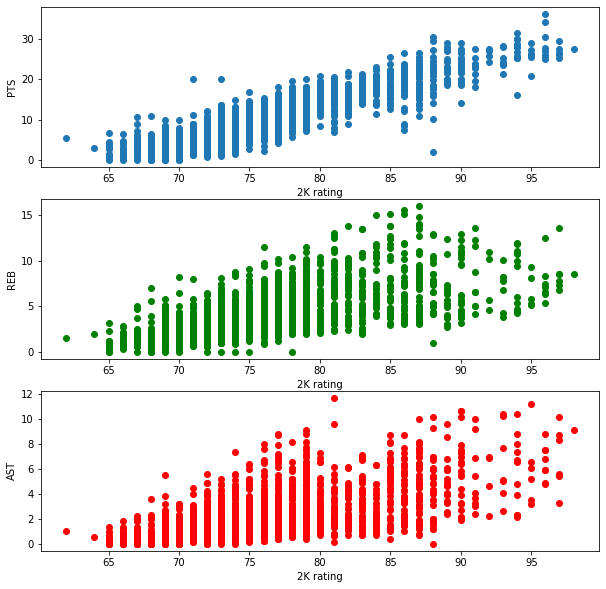

In [15]:
plt.figure(figsize=(10, 10))
plt.subplot(3,1,1)
plt.scatter(x=nba_df.NBA2K_rating, y=nba_df.PTS)
plt.xlabel('2K rating')
plt.ylabel('PTS')

plt.subplot(3,1,2)
plt.scatter(x=nba_df.NBA2K_rating, y=nba_df.REB, c='green')
plt.xlabel('2K rating')
plt.ylabel('REB')

plt.subplot(3,1,3)
plt.scatter(x=nba_df.NBA2K_rating, y=nba_df.AST, c='red')
plt.xlabel('2K rating')
plt.ylabel('AST')

Text(0.5, 1.0, 'Greek Freak through the years')

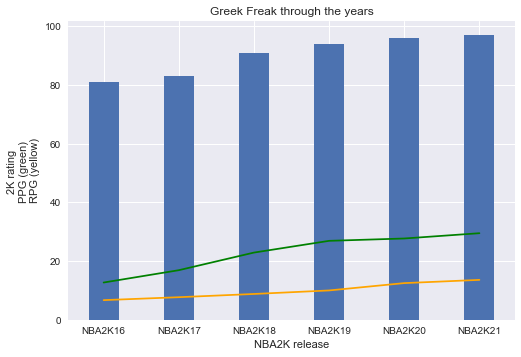

In [16]:
giannis_sort=giannis.sort_values('NBA2K_release', ascending=True)

x=giannis_sort['NBA2K_release']
y1=giannis_sort['NBA2K_rating']
y2=giannis_sort['PTS']
y3=giannis_sort['REB']

plt.style.use('seaborn')
plt.bar(x=x, height=giannis_sort['NBA2K_rating'], width=0.4)

plt.plot(x, y2, color='green')
plt.plot(x, y3, color='orange')

plt.ylabel('2K rating \nPPG (green) \nRPG (yellow)')
plt.xlabel('NBA2K release')
plt.title('Greek Freak through the years')

In [17]:
from nba_api.stats.static import players

nba_players_list=players.get_players()

nba_players_list # list consisting of dictionaries with players data 

[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False},
 {'id': 51,
  'full_name': 'Mahmoud Abdul-Rauf',
  'first_name': 'Mahmoud',
  'last_name': 'Abdul-Rauf',
  'is_active': False},
 {'id': 1505,
  'full_name': 'Tariq Abdul-Wahad',
  'first_name': 'Tariq',
  'last_name': 'Abdul-Wahad',
  'is_active': False},
 {'id': 949,
  'full_name': 'Shareef Abdur-Rahim',
  'first_name': 'Shareef',
  'last_name': 'Abdur-Rahim',
  'is_active': False},
 {'id': 76005,
  'full_name': 'Tom Abernethy',
  'first_name': 'Tom',
  'last_name': 'Abernethy',
  'is_active': False},
 {'id': 76006,
  'full_name': 'Forest Able',
  'first_name': 'Forest',
  'last_name': 'Able',
  'is_active': Fa

In [18]:
id_dict={}

for player in nba_players_list:
    player_id=player['id']
    player_full_name=player['full_name']
    
    id_dict[player_full_name]=player_id

In [19]:
id_dict

{'Alaa Abdelnaby': 76001,
 'Zaid Abdul-Aziz': 76002,
 'Kareem Abdul-Jabbar': 76003,
 'Mahmoud Abdul-Rauf': 51,
 'Tariq Abdul-Wahad': 1505,
 'Shareef Abdur-Rahim': 949,
 'Tom Abernethy': 76005,
 'Forest Able': 76006,
 'John Abramovic': 76007,
 'Alex Abrines': 203518,
 'Alex Acker': 101165,
 'Donald Ackerman': 76008,
 'Mark Acres': 76009,
 'Charles Acton': 76010,
 'Quincy Acy': 203112,
 'Alvan Adams': 76011,
 'Don Adams': 76012,
 'Hassan Adams': 200801,
 'Jaylen Adams': 1629121,
 'Jordan Adams': 203919,
 'Michael Adams': 149,
 'Steven Adams': 203500,
 'Rafael Addison': 912,
 'Bam Adebayo': 1628389,
 'Deng Adel': 1629061,
 'Rick Adelman': 76015,
 'Jeff Adrien': 202399,
 'Arron Afflalo': 201167,
 'Maurice Ager': 200772,
 'Mark Aguirre': 76016,
 'Blake Ahearn': 201336,
 'Danny Ainge': 76017,
 'Alexis Ajinca': 201582,
 'Henry Akin': 76018,
 'Josh Akognon': 203006,
 'DeVaughn Akoon-Purcell': 1629152,
 'Solomon Alabi': 202374,
 'Mark Alarie': 76019,
 'Gary Alcorn': 76020,
 'Furkan Aldemir': 20

In [20]:
nba_df['player_id']=nba_df['PLAYER']

nba_df['player_id'].replace(id_dict, inplace=True)

nba_df.sample(10, random_state=1)

,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,...,STL,BLK,PF,FP,DD2,TD3,+/-,NBA2K_rating,NBA2K_release,player_id
1662,615,Tyreke Evans,SAC,27,2016-17,40,17,23,19.7,10.3,...,0.9,0.2,1.5,20.8,0.0,0.0,-3.8,77.0,NBA2K18,201936
2383,600,Timofey Mozgov,CLE,28,2014-15,81,49,32,25.3,9.7,...,0.4,1.2,2.8,22.8,18.0,0.0,3.2,77.0,NBA2K16,202389
1398,179,Dwight Powell,DAL,25,2016-17,77,30,47,17.3,6.7,...,0.8,0.5,1.8,15.9,2.0,0.0,-2.2,73.0,NBA2K18,203939
1348,104,Clint Capela,HOU,23,2016-17,65,44,21,23.9,12.6,...,0.5,1.2,2.8,27.6,15.0,0.0,3.3,79.0,NBA2K18,203991
525,44,Anthony Davis,NOP,26,2018-19,56,25,31,33.0,25.9,...,1.6,2.4,2.4,56.1,37.0,0.0,2.4,94.0,NBA2K20,203076
608,208,Dwayne Bacon,CHA,23,2018-19,43,20,23,17.6,7.3,...,0.3,0.1,1.7,12.2,0.0,0.0,-0.5,73.0,NBA2K20,1628407
1059,359,Jaylen Morris,ATL,22,2017-18,6,2,4,16.4,4.7,...,0.3,0.2,0.3,10.1,0.0,0.0,-7.0,66.0,NBA2K19,1628537
2279,419,Marc Gasol,MEM,30,2014-15,81,55,26,33.2,17.4,...,0.9,1.6,2.6,37.7,20.0,0.0,2.8,87.0,NBA2K16,201188
1386,166,Devin Harris,DAL,34,2016-17,65,29,36,16.7,6.7,...,0.7,0.1,1.6,13.6,0.0,0.0,0.6,73.0,NBA2K18,2734
1448,245,James Ennis III,MEM,26,2016-17,64,32,32,23.4,6.7,...,0.7,0.3,2.6,15.2,1.0,0.0,0.7,72.0,NBA2K18,203516


In [21]:
# check
nba_df['player_id'].isnull().sum()

0

In [22]:
len(nba_df['player_id'].unique())==len(nba_df['PLAYER'].unique())

True

In [23]:
best_plus_minus=nba_df['+/-'].max()
worst_plus_minus=nba_df['+/-'].min()

In [24]:
nba_df[nba_df['+/-']==best_plus_minus]

,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,...,STL,BLK,PF,FP,DD2,TD3,+/-,NBA2K_rating,NBA2K_release,player_id
1777,156,Draymond Green,GSW,26,2015-16,81,73,8,34.7,14.0,...,1.5,1.4,3.0,41.8,33.0,13.0,13.2,90.0,NBA2K17,203110


In [25]:
nba_df[nba_df['+/-']==worst_plus_minus]

,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,...,STL,BLK,PF,FP,DD2,TD3,+/-,NBA2K_rating,NBA2K_release,player_id
2238,349,Julius Randle,LAL,20,2014-15,1,0,1,13.6,2.0,...,0.0,0.0,1.0,1.0,0.0,0.0,-18.0,74.0,NBA2K16,203944


## Feature engineering

<AxesSubplot:>

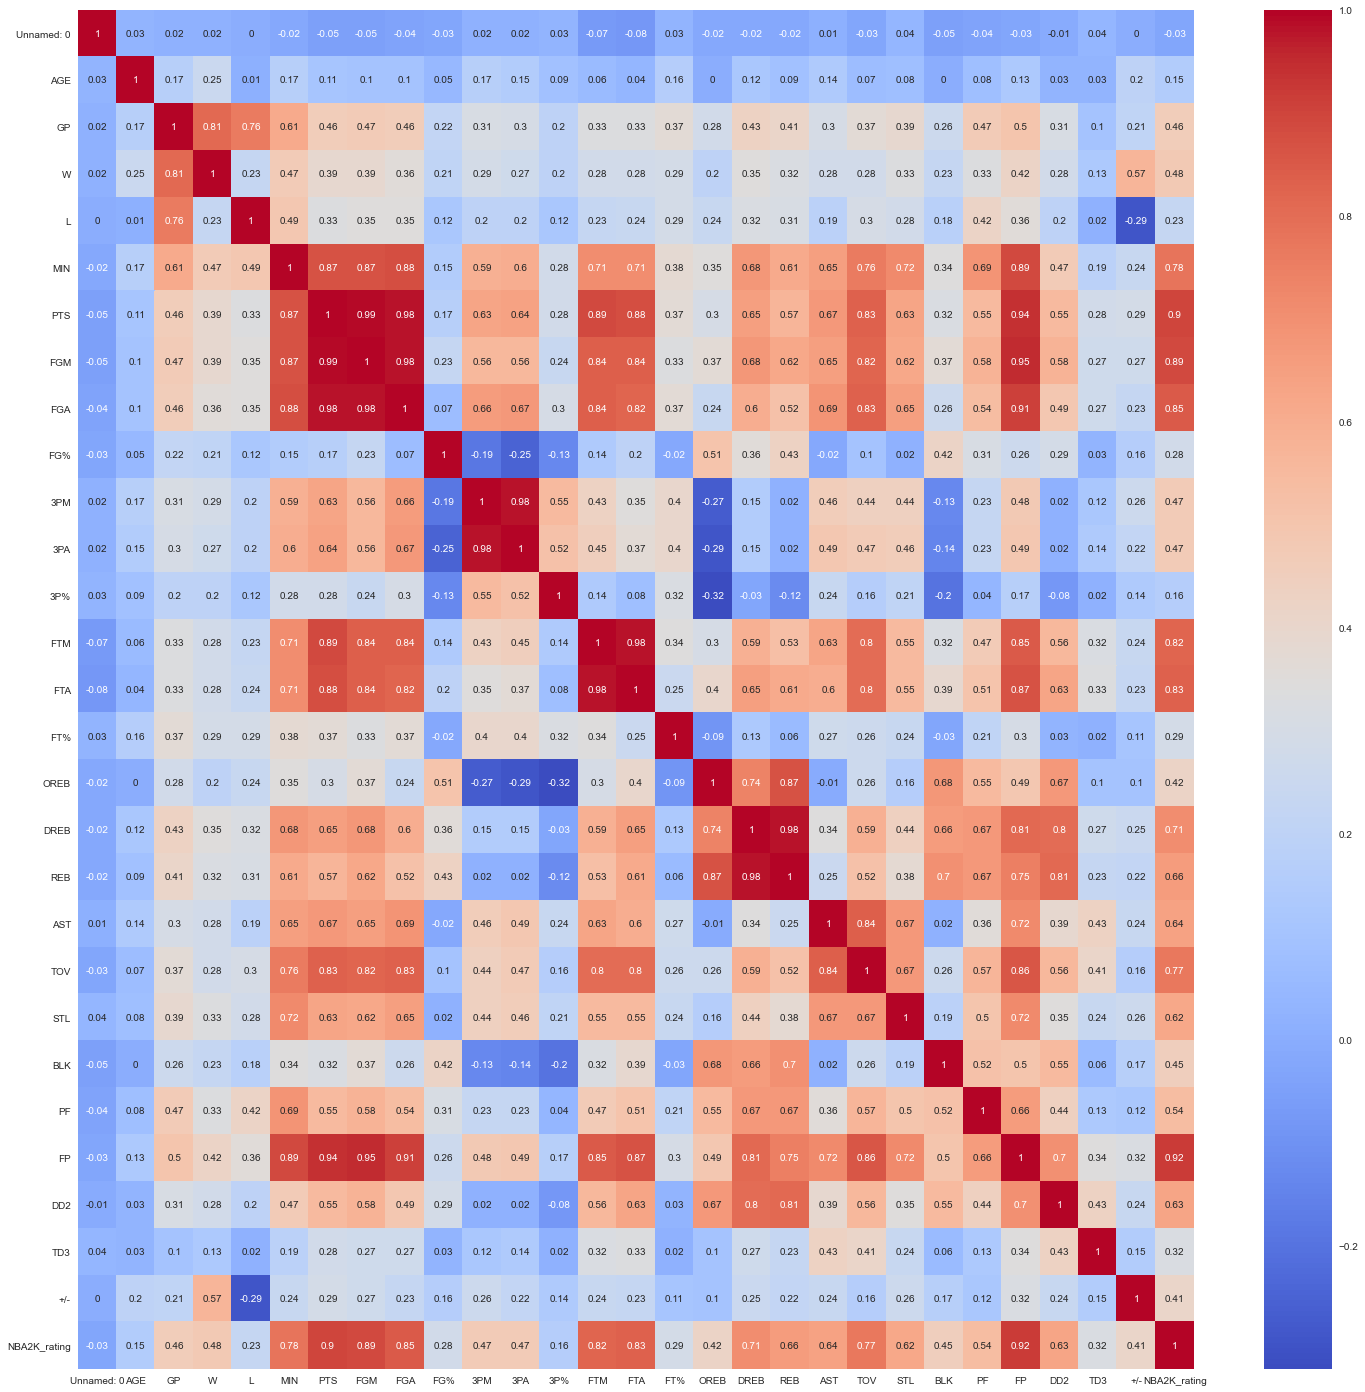

In [26]:
# visualizing correlations
plt.figure(figsize=(25,25))
sns.heatmap(round(nba_df.corr(), 2), annot=True, cmap='coolwarm')

Let's first drop columns which have low correlation with NBA2K_ratings (dependent variable).These are following:
- Unnamed: 0
- AGE
- L 
- FG%
- 3P%
- FT%

Now let's take a look at dependent variables which have multicollinearities. **Multicollinearity** is a statistical concept where independent variables in a model are correlated. Multicollinearity among independent variables will result in less reliable statistical inferences.

- Columns MIN, PTS, FGM and FGA are mutually correlated. This makes sense because if player plays more minutes on the court and takes more shots, there is higher chance he will make more shots and consequently score more points.
    - Action: drop FGM, FGA and MIN columns
    
- Columns 3PM and 3PA are highly correlated. This makes sense because if player attempts more 3P shots there is higher chance he will make more 3's.
    - Action: drop 3PA column
    
- Columns FTM and FTA are highly correlated with points scored.
    - Action: drop FTM and FTA column
    
- Columns OREB, DREB and REB are highly mutually correlated.
    - Action: drop OREB and DREB columns (under the assuption that if player is better overral rebounder it doesn't matter if the rebound is made on the offensive or defensive end)
    
- Columns AST, TOV and STL are highly mutually correlated. This makes sense because if aplayer tries to make more assists he will consequently have more turnovers (this is a common occurence for players playing at PG position).
    - Action: drop TOV column
    
We have such high number of correlated statistical categories because basketball has a lot of statistical categories that are derived from another (this is to better understand the game).

FP (number of fantasy points a player accumulates) is a derived from several statistical categories. The formula for FP calculation is FP = 1xPTS + 1,2xREB + 1,5xSTL + 3xBLK - 1xTOV. There is no wonder it is highly correlated with the most of dependent variables so this column will be dropped also.

In [27]:
# drop unnecessary columns

excess_stats=['Unnamed: 0', 'AGE', 'L', 'FG%', '3P%', 'FT%', 'FGA', 'FGM', 'MIN', '3PA', 'FTA', 'OREB', 'DREB', 'TOV', 'FP', 'PF', 'FTM', 'DD2', 'TD3']

nba_df.drop(excess_stats, axis=1, inplace=True)

<AxesSubplot:>

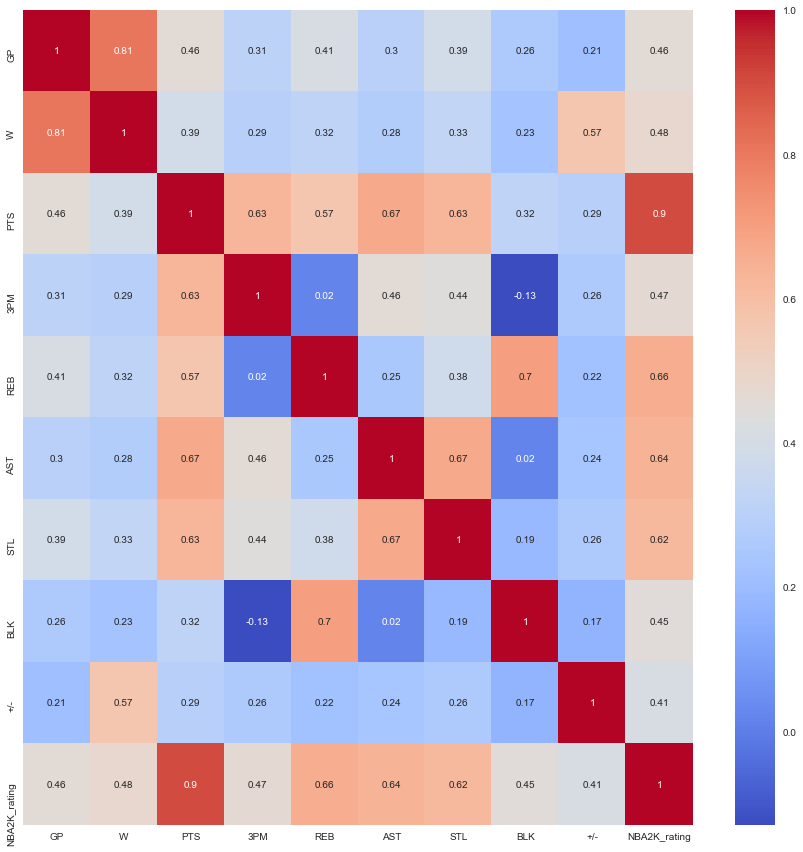

In [28]:
# visualizing correlations after dropping excess columns

plt.figure(figsize=(15,15))
sns.heatmap(round(nba_df.corr(), 2), annot=True, cmap='coolwarm')

It can be seen that GP (games played) and W (number of wins) are still highly mutually correlated. Let's drop W column because this column is also related with +/- column.

In [29]:
nba_df.drop('W', axis=1, inplace=True)

<AxesSubplot:>

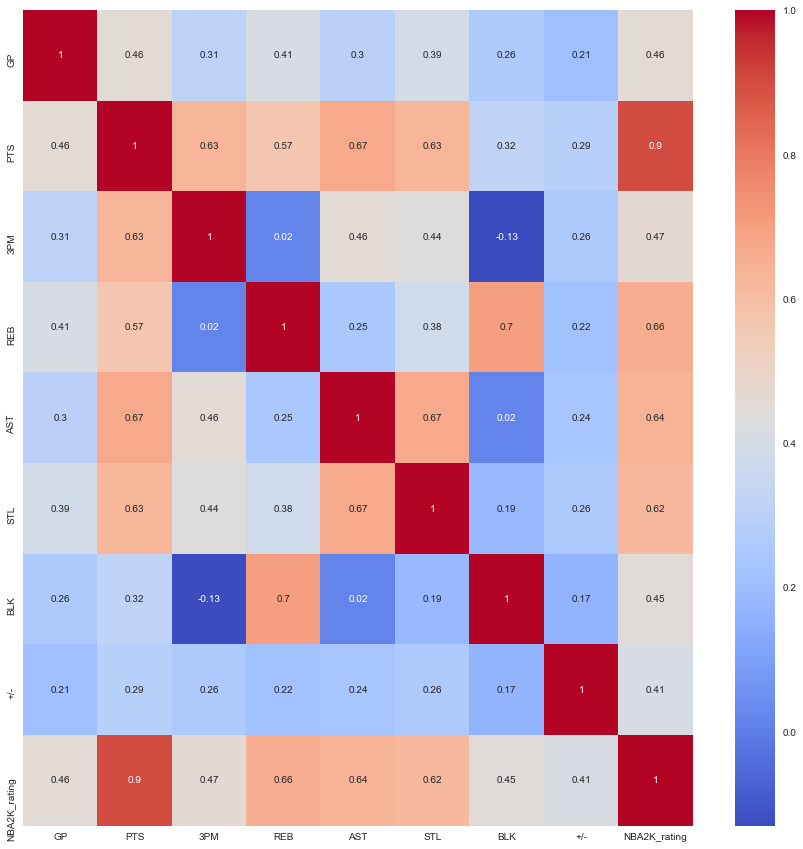

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(round(nba_df.corr(), 2), annot=True, cmap='coolwarm')

## Model building

Let's prepare dataframe for model building.

In [31]:
nba_df.head()

,PLAYER,TEAM,SEASON,GP,PTS,3PM,REB,AST,STL,BLK,+/-,NBA2K_rating,NBA2K_release,player_id
0,Aaron Gordon,ORL,2019-20,62,14.4,1.2,7.7,3.7,0.8,0.6,-1.1,80.0,NBA2K21,203932
1,Aaron Holiday,IND,2019-20,66,9.5,1.3,2.4,3.4,0.8,0.2,1.7,76.0,NBA2K21,1628988
2,Abdel Nader,OKC,2019-20,55,6.3,0.9,1.8,0.7,0.4,0.4,-1.5,71.0,NBA2K21,1627846
3,Adam Mokoka,CHI,2019-20,11,2.9,0.5,0.9,0.4,0.4,0.0,4.5,68.0,NBA2K21,1629690
4,Admiral Schofield,WAS,2019-20,33,3.0,0.6,1.4,0.5,0.2,0.1,-1.7,71.0,NBA2K21,1629678


In [32]:
nba_df.drop(['PLAYER', 'TEAM', 'SEASON', 'NBA2K_release', 'player_id'], axis=1, inplace=True)

In [33]:
X=nba_df.drop(['NBA2K_rating'], axis=1)
y=nba_df['NBA2K_rating'] # dependent variable

In [34]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,random_state=10)

#### Linear Regression model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr=LinearRegression()

In [37]:
# fitting the model
lr.fit(train_X, train_y)

LinearRegression()

In [38]:
lr.score(test_X, test_y)

0.8722695567627856

#### Grid Search CV

In [39]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import ShuffleSplit

In [41]:
def GridSearchCV_function(X, y):
    """This function will find the best model using GridSearchCV"""
    
    algorithms = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'xgboost' : {
            'model' : XGBRegressor(),
            'params' : {
                'n_estimators':[100, 500, 900, 1100, 1500],
                'learning_rate':[0.05, 0.1, 0.15, 0.2],
                'booster':['gbtree', 'gblinear'],
                'base_score':[0.25, 0.5, 0.75, 1]
            }
        },
        'lasso' : {
            'model' : Lasso(), 
            'params' : {
                'alpha' : [1, 2], 
                'selection' : ['random', 'cyclic']
            } 
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    
    scores = []
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algorithm_name, config in algorithms.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        
        scores.append({
            'model' : algorithm_name, 
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [42]:
%%time

GridSearchCV_function(X, y)

Wall time: 19min 35s


,model,best_score,best_params
0,linear_regression,0.868142,{'normalize': True}
1,xgboost,0.868929,"{'base_score': 0.25, 'booster': 'gbtree', 'lea..."
2,lasso,0.847692,"{'alpha': 1, 'selection': 'random'}"
3,decision_tree,0.757002,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [43]:
# prediction function
def predict_rating(pts, reb, ast, stl, blk, three_p, plus_minus, gp):
    x=np.zeros(len(X.columns))
    
    x[1]=pts
    x[3]=reb
    x[4]=ast
    x[5]=stl
    x[6]=blk
    x[2]=three_p
    x[7]=plus_minus
    x[0]=gp
        
    return int(lr.predict([x])[0])

In [45]:
#LeBron James 2020/21 season stats
predict_rating(25.0, 7.8, 7.7, 1.1, 0.6, 2.3, 6.4, 45)

90

This was prediction for LeBron James based on his 2020-21 season stats. The model predicted NBA2K22 rating of 90, while his true rating is 96 (recently revealed). There is certainly something model doesn't take into account (possibly player's reputation, records etc.).

In [46]:
#Zach LaVine 2020/21 season stats
predict_rating(27.4, 5.0, 4.9, 0.8, 0.5, 3.4, -0.2, 58)

87

Predicted rating for Zach Lavine's stats for season 2020/21 was 87, which is exact same rating LaVine got from 2K on NBA2K22 release.

### Exporting model to a pickle file

In [47]:
# exporting model names to a pickle file 
import pickle

with open('NBA2K_player_rating_prediction_model.pickle', 'wb') as f:
    pickle.dump(lr, f)

In [48]:
# exporting columns names to a json file 
import json

columns={
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))